In [1]:
import sqlite3
import pandas as pd

db=sqlite3.connect("Employee.sqlite")
cur=db.cursor()

query1="create table Employee(employeeid int , name varchar(30), age int(2), department varchar(20), Salary int,primary key(employeeid))"
cur.execute(query1)

db.commit()

query2 ="insert into Employee values(100,'Rishav',25,'Marketing',50000)"
cur.execute(query2)
db.commit()

query3 ="insert into Employee values(101,'Abhishekh',26,'operations',60000)"
cur.execute(query3)
db.commit()

query4 ="insert into Employee values(102,'Aman',24,'Human Resource',75000)"
cur.execute(query4)
db.commit()

employee_id_to_remove = 101
cur.execute("DELETE FROM Employee WHERE employeeid = ?", (employee_id_to_remove,))

employee_id_to_remove = 102
cur.execute("DELETE FROM Employee WHERE employeeid = ?", (employee_id_to_remove,))

employee_id_to_remove = 103
cur.execute("DELETE FROM Employee WHERE employeeid = ?", (employee_id_to_remove,))

sql_query = 'create table Employee_Detail(Employee_ID int primary key, Name text, Age int, Department text, Salary int )'
cur.execute(sql_query)
values = [(101, 'Aadarsh', 25, 'Marketing', 50000),(102, 'Aarti', 27, 'Operations', 60000),(103, 'Siddharth', 25, 'Finance', 85000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()
values = [(104, 'Aman', 24, 'Human Resource', 75000),(105, 'Amit', 30, 'Marketing', 50000),(106, 'Shivansh', 26, 'IT', 90000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()
values = [(107, 'Vaibhav', 23, 'Finance', 85000),(108, 'Himanshu', 26, 'IT', 90000),(109, 'Raman', 25, 'Operations', 60000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()
values = [(110, 'Kunal', 26, 'Marketing', 50000),(111, 'Adhira', 29, 'Human Resource', 75000),(112, 'Tanya', 24, 'Marketing', 50000)]
cur.executemany('Insert into Employee_Detail values (?,?,?,?,?)', values)
db.commit()

In [2]:
cur.execute('select * from Employee_Detail where Department = "Finance"')
ans=cur.fetchall()
for i in ans:
    print(i[0])

103
107


In [3]:
cur.execute('select Department,count(*) from Employee_Detail group by Department')
ans = cur.fetchall()
for i in ans:
    print(i[0],i[1])
db.close()

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


data = pd.read_sql_query("select * from Student",db)
data

In [4]:
data=pd.DataFrame([[201,"Naman","Science",24000],[202,"Aman","Maths",25000]],columns=["ID","Name","SUbject","Salary"])
data

,ID,Name,SUbject,Salary
0,201,Naman,Science,24000
1,202,Aman,Maths,25000


data.to_sql("Faculties",db)

data["Address"] = "Test"
data.to_sql("Faculties",db,if_exists="replace")

In [7]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query("select * from IMDB",db)
data

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,...,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,...,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,...,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,...,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [8]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")
cur=db.cursor()
data = pd.read_sql_query('select * from genre', db)
data = data[data['genre']!='']
data = data["genre"].value_counts()

for i in range(len(data)):
    print(data.index[i],data.values[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Animation 13
Romance 13
Crime 11
Mystery 7
Fantasy 7
History 6
Family 3
Sport 3
Music 3
Western 2
War 2
Horror 2
Musical 1


In [9]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('select * from earning inner join IMDB on earning.Movie_id=IMDB.Movie_id',db)

data["Total"] = data["Domestic"] + data["Worldwide"]

max1 = max(data["Total"])
data=data[data['Total']==max1]
print(data.values[0][5])


8.1


In [10]:
import pandas as pd
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

data = pd.read_sql_query('select * from IMDB',db)
max1 = max(data['TotalVotes'])
data=data[data['TotalVotes']==max1]
print(data.values[0][1],data.values[0][2])

Inception (2010) 8.8


In [11]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')

data = pd.read_sql_query('select * from IMDB',db)

def time(runtime):
    return runtime.strip().split(" ")[0]

data['Runtime'] = data['Runtime'].apply(time)
data['Runtime'].replace('',np.nan,inplace=True)
data['Runtime'].astype(float) 

data.dropna(inplace=True,subset=['Runtime'])
data['Runtime']=data['Runtime'].astype(int)
max1 = max(data['Runtime'])
data=data[data['Runtime']== max1]

print(data['Title'].values[0],data['Runtime'].values[0])

The Wolf of Wall Street (2013) 180


In [12]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')    

data = pd.read_sql_query('select * from earning  join IMDB using(Movie_id)',db)

data['Total'] = data['Domestic'] + data['Worldwide']
data['Budget'].replace('',np.nan,inplace=True)
data['Budget'].astype(float)
data['Profit']=data['Total']-data['Budget']

max1 = max(data['Profit'])
data=data[data['Profit']==max1]
print(data.values[0][3])

Star Wars: The Force Awakens (2015)


In [13]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')    

data = pd.read_sql_query("select * from earning join IMDB using(Movie_ID)",db)
data['Total'] = data['Domestic'] + data['Worldwide']
data['Budget'].replace('',np.nan,inplace=True)
data['Budget'].astype(float)
data['Profit']=data['Total']-data['Budget']

min1 = min(data['Budget'])
data=data[(data['Budget']==min1)]
data=data[data['Profit']==max(data['Profit'])]
print(data['Title'].values[0])

Short Term 12 (2013)


In [30]:
import pandas as pd
import numpy as np
import sqlite3

db = sqlite3.connect('IMDB.sqlite')    

data = pd.read_sql_query("select * from earning join IMDB using(Movie_ID)",db)
data['Total'] = data['Domestic'] + data['Worldwide']
data['Total'].replace('',np.nan,inplace=True)

def year(title):
    return int(title.strip().split(" ")[-1][-5:-1])

data['Year'] = data['Title'].apply(year)

m = data.groupby('Year')['Total'].max()

#print(m.values)
#print(data['Total'])

d = {}
for i in range(len(data['Total'])):
    if data['Total'][i] in (m.values):
        key = data['Year'][i]
        value = data['Title'][i]
        d[key] = value
        
for i  in sorted(d):
    print(i,d[i])


[1.48197458e+09 6.58561234e+08 2.14217090e+09 1.28967979e+09
 1.10650523e+09 3.00488585e+09 1.58823460e+09]
0      2.444052e+08
1      7.907403e+07
2      7.420198e+07
3      1.024234e+08
4      2.657898e+07
           ...     
112    6.207404e+07
113    6.606458e+08
114    9.817843e+08
115    5.000324e+08
116    1.365052e+09
Name: Total, Length: 117, dtype: float64
2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


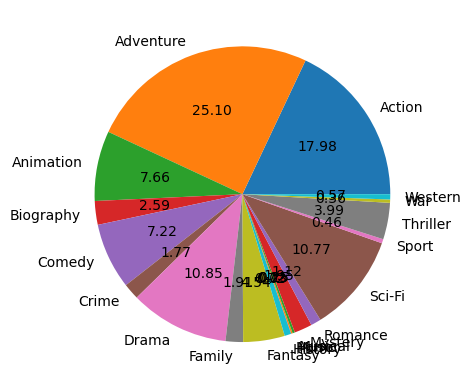

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

db = sqlite3.connect('IMDB.sqlite')    

data = pd.read_sql_query("select * from IMDB join genre using(Movie_ID)",db)

data['Budget'].replace("",0,inplace=True)
data.Budget.unique()
data["genre"].replace('',np.NaN,inplace=True)
data.dropna(subset = ["genre"],inplace=True)
grouped_sum = data.groupby("genre")["Budget"].sum()

for i in range(len(grouped_sum)):
    percentage=grouped_sum.values[i]/(sum(grouped_sum))*100
    print(grouped_sum.index[i],format(percentage,".2f"))

plt.pie(grouped_sum,labels=grouped_sum.index,autopct="%.2f")
plt.show()